<a href="https://colab.research.google.com/github/Tadamiao/Guided-Project/blob/main/handwashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Url <-https://app.datacamp.com/learn/projects/discovery-of-handwashing

In [ ]:
#Activate R
%load_ext rpy2.ipython

In [ ]:
#Load package
%%R 
install.packages("tidyverse")
library(tidyverse)

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz6GdoF/downloaded_packages’



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ readr::parse_date() masks curl::parse_date()


In [ ]:
#Load Data (https://stackoverflow.com/questions/52358481/im-trying-to-read-in-a-csv-file-from-github-in-r-however-when-i-try-to-get-th)
%%R
data_clinic <- read.csv("https://raw.githubusercontent.com/islamtaha/DataCamp/master/Dr.%20Semmelweis%20and%20the%20discovery%20of%20handwashing/datasets/yearly_deaths_by_clinic.csv", header= TRUE)
head(data_clinic)

  year births deaths   clinic
1 1841   3036    237 clinic 1
2 1842   3287    518 clinic 1
3 1843   3060    274 clinic 1
4 1844   3157    260 clinic 1
5 1845   3492    241 clinic 1
6 1846   4010    459 clinic 1


In [ ]:
#Proportion of death
%%R
data_clinic <- data_clinic %>% 
mutate(death_ratio = deaths/births)

print(data_clinic)

   year births deaths   clinic death_ratio
1  1841   3036    237 clinic 1  0.07806324
2  1842   3287    518 clinic 1  0.15759051
3  1843   3060    274 clinic 1  0.08954248
4  1844   3157    260 clinic 1  0.08235667
5  1845   3492    241 clinic 1  0.06901489
6  1846   4010    459 clinic 1  0.11446384
7  1841   2442     86 clinic 2  0.03521704
8  1842   2659    202 clinic 2  0.07596841
9  1843   2739    164 clinic 2  0.05987587
10 1844   2956     68 clinic 2  0.02300406
11 1845   3241     66 clinic 2  0.02036409
12 1846   3754    105 clinic 2  0.02797017


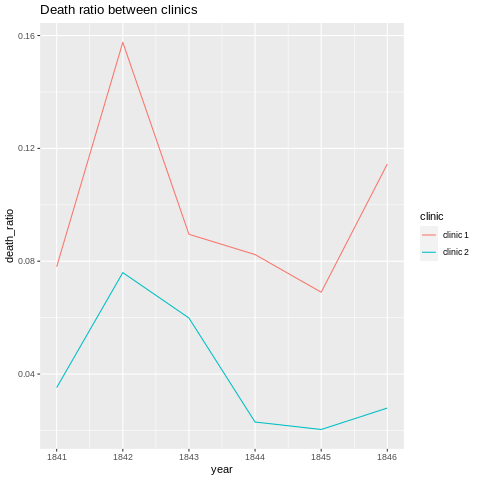

In [ ]:
#Plot

#Setting size of the plot
%%R
options(repr.plot.width= 7, repr.plot.height= 4)

ggplot(data_clinic, aes(x=year, y=death_ratio, col=clinic))+
geom_line()+
labs(title= "Death ratio between clinics")

In [ ]:
#Load monthly data
%%R
monthly <-read.csv("https://raw.githubusercontent.com/aysbt/DataCampProject/master/Dr_Semmelweis_and_the_Discovery_of_Handwashing/datasets/monthly_deaths.csv", header= TRUE)

monthly <- monthly %>%
mutate(ratio_death = deaths/births)

head(monthly)

        date births deaths ratio_death
1 1841-01-01    254     37 0.145669291
2 1841-02-01    239     18 0.075313808
3 1841-03-01    277     12 0.043321300
4 1841-04-01    255      4 0.015686275
5 1841-05-01    255      2 0.007843137
6 1841-06-01    200     10 0.050000000


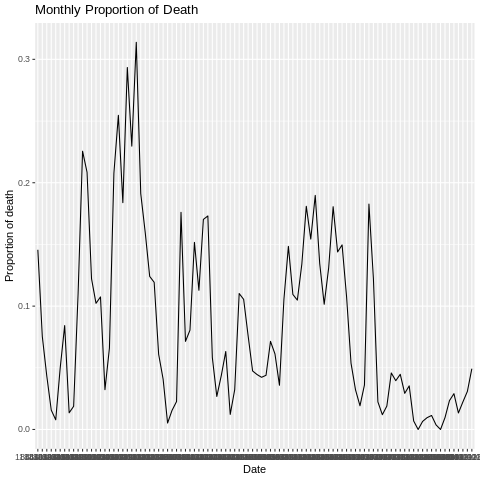

In [ ]:
#Plot monthly(https://stackoverflow.com/questions/27082601/ggplot2-line-chart-gives-geom-path-each-group-consist-of-only-one-observation)
%%R
ggplot(monthly, aes(x=date, y=ratio_death, group=1)) +
geom_line()+
labs(title= "Monthly Proportion of Death", x="Date", y="Proportion of death")

In [ ]:
#Handwashing start
%%R
handwashing_start= as.Date('1847-06-01')

monthly <- monthly %>%
mutate(handwashing_started= date >= handwashing_start)

head(monthly)

        date births deaths ratio_death handwashing_started
1 1841-01-01    254     37 0.145669291               FALSE
2 1841-02-01    239     18 0.075313808               FALSE
3 1841-03-01    277     12 0.043321300               FALSE
4 1841-04-01    255      4 0.015686275               FALSE
5 1841-05-01    255      2 0.007843137               FALSE
6 1841-06-01    200     10 0.050000000               FALSE


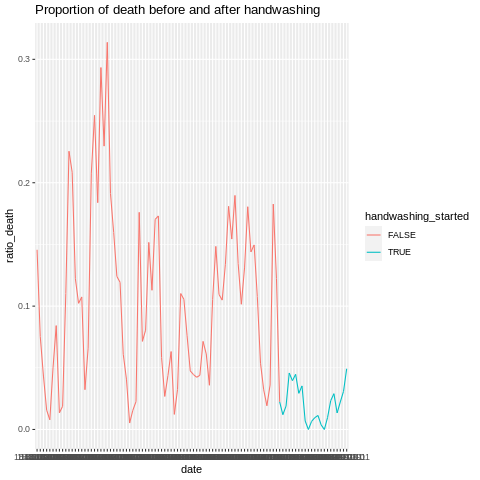

In [ ]:
#Plot before and after handwashing
%%R
ggplot(monthly, aes(x=date, y=ratio_death, col=handwashing_started, group=1))+
geom_line()+
labs(title= "Proportion of death before and after handwashing")

In [ ]:
#Summarise effect of handwashing
#Calculate mean before and after handwashing
%%R
monthly_summary <- monthly %>%
group_by(handwashing_started) %>%
summarize(mean_death_ratio= mean(ratio_death))

head(monthly_summary)

# A tibble: 2 × 2
  handwashing_started mean_death_ratio
  <lgl>                          <dbl>
1 FALSE                         0.105 
2 TRUE                          0.0211


In [ ]:
#t.test
#Calculating t-test with 95% confidence interval
%%R
test_result <- t.test(ratio_death ~handwashing_started ,data=monthly)

print(test_result)


	Welch Two Sample t-test

data:  ratio_death by handwashing_started
t = 9.6101, df = 92.435, p-value = 1.445e-15
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.06660662 0.10130659
sample estimates:
mean in group FALSE  mean in group TRUE 
         0.10504998          0.02109338 

